## Import essential libraries

In [1]:
import time
import pickle
from gmm import *
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from multiprocessing import Pool
from collections import defaultdict
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split

plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 8,6
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

%load_ext autoreload
%autoreload 2

## Read sample data

In [2]:
df = pd.read_csv("../datasets/2B/coast/train_0.csv", header=None)
X = df.to_numpy()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.98080,0.98211,0.41813,1.014800e-11,2.590300e-10,3.115900e-07,-0.29073,-0.398550,-1.388200,0.000529,...,0.000428,0.007660,0.003981,0.018343,1.6161,1.5720,1.8232,3.2124,2.2108,2.6424
1,0.52013,0.28381,0.44948,2.355200e-08,1.111200e-05,2.319000e-07,0.38395,0.718100,1.000500,0.000353,...,0.000176,0.005468,0.001940,0.027341,2.7736,2.6344,3.1931,1.3373,2.5650,3.0839
2,0.68152,0.43121,0.30115,2.895600e-09,2.249800e-08,1.818700e-10,0.69114,0.058977,-0.051016,0.000680,...,0.000731,0.011112,0.006400,0.007131,1.7541,1.4404,1.0160,2.8070,2.6903,2.6930
3,0.62619,0.48974,0.80199,4.108500e-12,2.825400e-08,7.803400e-09,0.60768,-0.493730,1.177200,0.000605,...,0.000731,0.009222,0.006299,0.011641,2.1030,2.0801,1.5434,1.4591,3.0236,1.3988
4,0.60757,0.65997,0.86624,3.977500e-12,1.739400e-07,5.157000e-08,0.22185,-1.254900,0.304900,0.000353,...,0.000605,0.005543,0.003981,0.022955,2.2475,1.4874,2.1702,2.3613,1.4043,1.6768


## Training GMMs

### Q = 5

In [3]:
q = 5
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
for class_name in classes:
    gmm = GMM_vl(q=q, tol=1e-6)
    gmm.fit(class_name=class_name, epochs=30)
    
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fin = open(fname, "wb")
    pickle.dump(gmm, fin)
    fin.close()

In [4]:
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
class_wise_gmm = {}
for class_name in classes:
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fout = open(fname, "rb")
    gmm = pickle.load(fout)
    fout.close()
    
    class_wise_gmm[class_name] = gmm

In [5]:
gmm_cl = GMM_vl_classifier()
gmm_cl.compile(class_wise_gmm)
gmm_cl.classify()
train_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(train_acc)

gmm_cl.classify(dev=True)
dev_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(dev_acc)

,Accuracy
coast,100.0
highway,100.0
mountain,100.0
opencountry,100.0
tallbuilding,100.0


,Accuracy
coast,78.082192
highway,32.692308
mountain,54.666667
opencountry,63.414634
tallbuilding,91.549296


### Q = 20

In [6]:
q = 20
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
for class_name in classes:
    gmm = GMM_vl(q=q, tol=1e-6)
    gmm.fit(class_name=class_name, epochs=30)
    
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fin = open(fname, "wb")
    pickle.dump(gmm, fin)
    fin.close()

In [7]:
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
class_wise_gmm = {}
for class_name in classes:
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fout = open(fname, "rb")
    gmm = pickle.load(fout)
    fout.close()
    
    class_wise_gmm[class_name] = gmm

In [8]:
gmm_cl = GMM_vl_classifier()
gmm_cl.compile(class_wise_gmm)
gmm_cl.classify()
train_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(train_acc)

gmm_cl.classify(dev=True)
dev_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(dev_acc)

,Accuracy
coast,100.0
highway,100.0
mountain,100.0
opencountry,100.0
tallbuilding,100.0


,Accuracy
coast,80.821918
highway,0.000000
mountain,45.333333
opencountry,40.243902
tallbuilding,92.957746


### Q = 3

In [9]:
q = 3
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
for class_name in classes:
    gmm = GMM_vl(q=q, tol=1e-6)
    gmm.fit(class_name=class_name, epochs=30)
    
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fin = open(fname, "wb")
    pickle.dump(gmm, fin)
    fin.close()

In [10]:
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
class_wise_gmm = {}
for class_name in classes:
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fout = open(fname, "rb")
    gmm = pickle.load(fout)
    fout.close()
    
    class_wise_gmm[class_name] = gmm

In [11]:
gmm_cl = GMM_vl_classifier()
gmm_cl.compile(class_wise_gmm)
gmm_cl.classify()
train_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(train_acc)

gmm_cl.classify(dev=True)
dev_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(dev_acc)

,Accuracy
coast,99.601594
highway,100.000000
mountain,99.616858
opencountry,100.000000
tallbuilding,100.000000


,Accuracy
coast,86.301370
highway,46.153846
mountain,73.333333
opencountry,69.512195
tallbuilding,90.140845


### Q = 14

In [12]:
q = 14
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
for class_name in classes:
    gmm = GMM_vl(q=q, tol=1e-6)
    gmm.fit(class_name=class_name, epochs=30)
    
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fin = open(fname, "wb")
    pickle.dump(gmm, fin)
    fin.close()

In [13]:
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
class_wise_gmm = {}
for class_name in classes:
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fout = open(fname, "rb")
    gmm = pickle.load(fout)
    fout.close()
    
    class_wise_gmm[class_name] = gmm

In [14]:
gmm_cl = GMM_vl_classifier()
gmm_cl.compile(class_wise_gmm)
gmm_cl.classify()
train_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(train_acc)

gmm_cl.classify(dev=True)
dev_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(dev_acc)

,Accuracy
coast,100.0
highway,100.0
mountain,100.0
opencountry,100.0
tallbuilding,100.0


,Accuracy
coast,80.821918
highway,0.000000
mountain,45.333333
opencountry,40.243902
tallbuilding,92.957746


### Best Model

In [15]:
q = 3
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]
class_wise_gmm = {}
for class_name in classes:
    fname = "results/" + class_name + "_q_"+str(q)+".pickle"
    fout = open(fname, "rb")
    gmm = pickle.load(fout)
    fout.close()
    
    class_wise_gmm[class_name] = gmm

In [16]:
def get_confusion_matrices(gmm_cl, title="Confusion Matrix"):
    mapping = {"coast":0, "highway":1, "mountain":2, "opencountry":3, "tallbuilding":4}
    complete_pred = np.array([])
    complete_true = np.array([])
    
    for i in gmm_cl.predictions:
        pred = gmm_cl.predictions[i]
        new_array = mapping[i]*np.ones(pred.shape)
        
        complete_pred = np.append(complete_pred, pred)
        complete_true = np.append(complete_true, new_array)
        
    conf_mat = confusion_matrix(complete_pred, complete_true)
    plt.figure()
    sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()
    
    acc = 100*np.sum(complete_pred==complete_true)/complete_true.size
    return acc

,Accuracy
coast,99.601594
highway,100.000000
mountain,99.616858
opencountry,100.000000
tallbuilding,100.000000


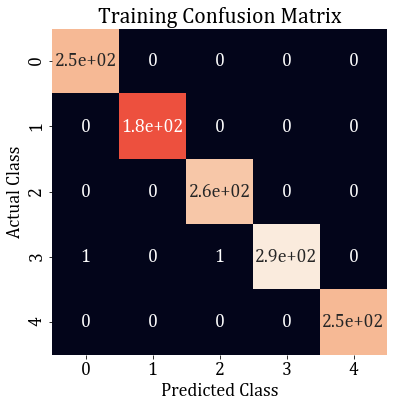

,Accuracy
coast,86.301370
highway,46.153846
mountain,73.333333
opencountry,69.512195
tallbuilding,90.140845


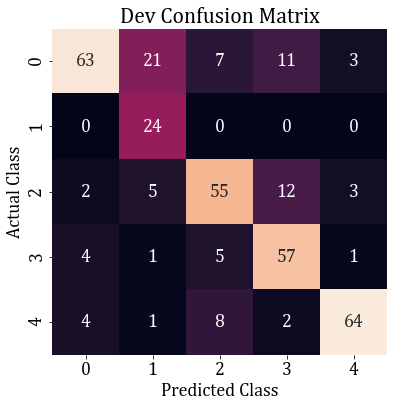

Training Accuracy: 99.83739837398375
Dev Accuracy: 74.5042492917847


In [17]:
gmm_cl = GMM_vl_classifier()
gmm_cl.compile(class_wise_gmm)
gmm_cl.classify()
train_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(train_acc)
train_acc = get_confusion_matrices(gmm_cl, title="Training Confusion Matrix")

gmm_cl.classify(dev=True)
dev_acc = pd.DataFrame(gmm_cl.accuracy, ["Accuracy"]).T
display(dev_acc)
dev_acc = get_confusion_matrices(gmm_cl, title="Dev Confusion Matrix")

print("Training Accuracy:", train_acc)
print("Dev Accuracy:", dev_acc)